# Dimensionality Reduction

## Project Proposal

In this tab, I will try to use PCA and t-SNE method to reduce the dimension for better analyzing the mobile phone dataset. 

In this part, the library will include json, numpy, pandas, matplotlib, scikit-learn, etc.

## Code

In [3]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
from sklearn.preprocessing import StandardScaler

In [4]:
df=pd.read_csv("../../../data/01-modified-data/after_clean_mobile_phone_rating.csv")

In [23]:
x=df[['Launch Price','CAMERA','SELFIE','AUDIO','DISPLAY','BATTERY']]
y=df[['buying_intent']]
scaler = StandardScaler()
X = scaler.fit_transform(x)


### Dimensionality Reduction with PCA

In [6]:
# EIGEN VALUES/VECTOR
from numpy import linalg as LA
# w, v1 = LA.eig(cov)
w, v1 = LA.eig(np.cov(X.T))
print("\nCOV EIGENVALUES:",w)
print("COV EIGENVECTORS (across rows):")
print(v1.T)


COV EIGENVALUES: [2.46422101 1.21865397 0.24126397 0.958379   0.63183561 0.52512012]
COV EIGENVECTORS (across rows):
[[ 0.50024701  0.53945186  0.20733577  0.42438368  0.44295301 -0.19861426]
 [ 0.39766903  0.19014289 -0.67810966 -0.25218719 -0.31386294 -0.42867702]
 [-0.69792826  0.69118266 -0.15187461 -0.05535362  0.03015126 -0.09013136]
 [ 0.21875576  0.21730996 -0.34121012 -0.27020298  0.26679962  0.8026869 ]
 [-0.19511955 -0.26042618 -0.57511145  0.73310744  0.13997149  0.07946605]
 [ 0.13631836  0.2829461   0.16412113  0.3778623  -0.78332594  0.34357475]]


In [15]:
# PCA CALCULATION
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(X)
print('\nPCA')
print(pca.components_)


PCA
[[-0.50024701 -0.53945186 -0.20733577 -0.42438368 -0.44295301  0.19861426]
 [ 0.39766903  0.19014289 -0.67810966 -0.25218719 -0.31386294 -0.42867702]
 [ 0.21875576  0.21730996 -0.34121012 -0.27020298  0.26679962  0.8026869 ]
 [-0.19511955 -0.26042618 -0.57511145  0.73310744  0.13997149  0.07946605]
 [ 0.13631836  0.2829461   0.16412113  0.3778623  -0.78332594  0.34357475]
 [ 0.69792826 -0.69118266  0.15187461  0.05535362 -0.03015126  0.09013136]]


/var/folders/rx/nxz5w_293m7dsx3fbcd187380000gn/T/ipykernel_26861/2939638508.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:,0],X[:,1],X[:,2],marker=".", cmap="viridis")


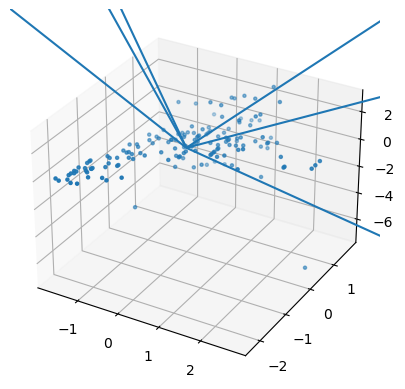

In [12]:
# # PLOT
v2=pca.components_
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],marker=".", cmap="viridis")
v1=v1*1000
v2=v2*1000

ax.quiver(0,0,0,v1[0,0],v1[1,0],v1[2,0])
ax.quiver(0,0,0,v1[0,1],v1[1,1],v1[2,1])
ax.quiver(0,0,0,v1[0,2],v1[1,2],v1[2,2])

ax.quiver(0,0,0,v2[0,0],v2[1,0],v2[2,0])
ax.quiver(0,0,0,v2[0,1],v2[1,1],v2[2,1])
ax.quiver(0,0,0,v2[0,2],v2[1,2],v2[2,2])
plt.show()

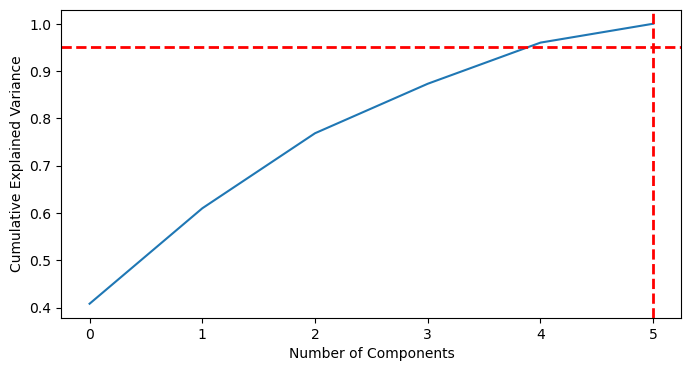

In [18]:
plt.figure(figsize=(8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='red', linestyle='--', linewidth=2, label='95% explained variance')
cum_explained=np.cumsum(pca.explained_variance_ratio_)
optimal_components = np.where(cum_explained >= 0.95)[0][0]+1
plt.axvline(x=optimal_components, color='red', linestyle='--', linewidth=2, label=f'Optimal components: {optimal_components}')
plt.show()

As shown, the number of components that can make 95% cummulative explained variance is 5.

### Dimensionality Reduction with t-SNE

In [19]:
from sklearn.manifold import TSNE

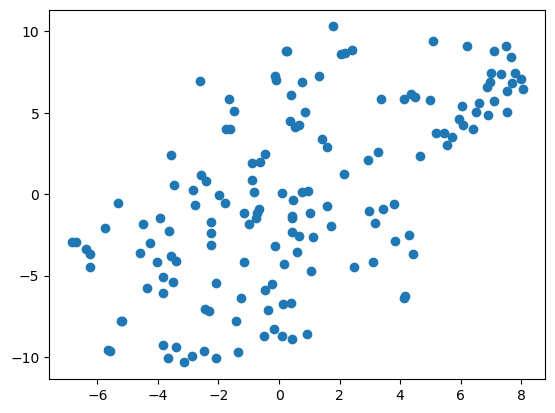

In [42]:
# 2D
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000)
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

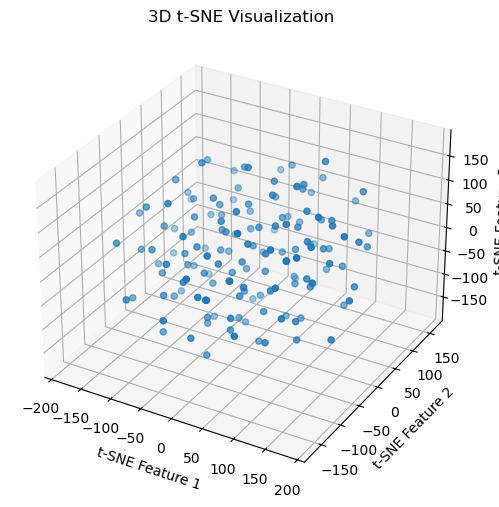

In [41]:
# 3D
tsne = TSNE(n_components=3, perplexity=30, learning_rate=200, n_iter=1000)
X_tsne = tsne.fit_transform(X)


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2])

ax.set_xlabel('t-SNE Feature 1')
ax.set_ylabel('t-SNE Feature 2')
ax.set_zlabel('t-SNE Feature 3')
plt.title('3D t-SNE Visualization')
plt.show()

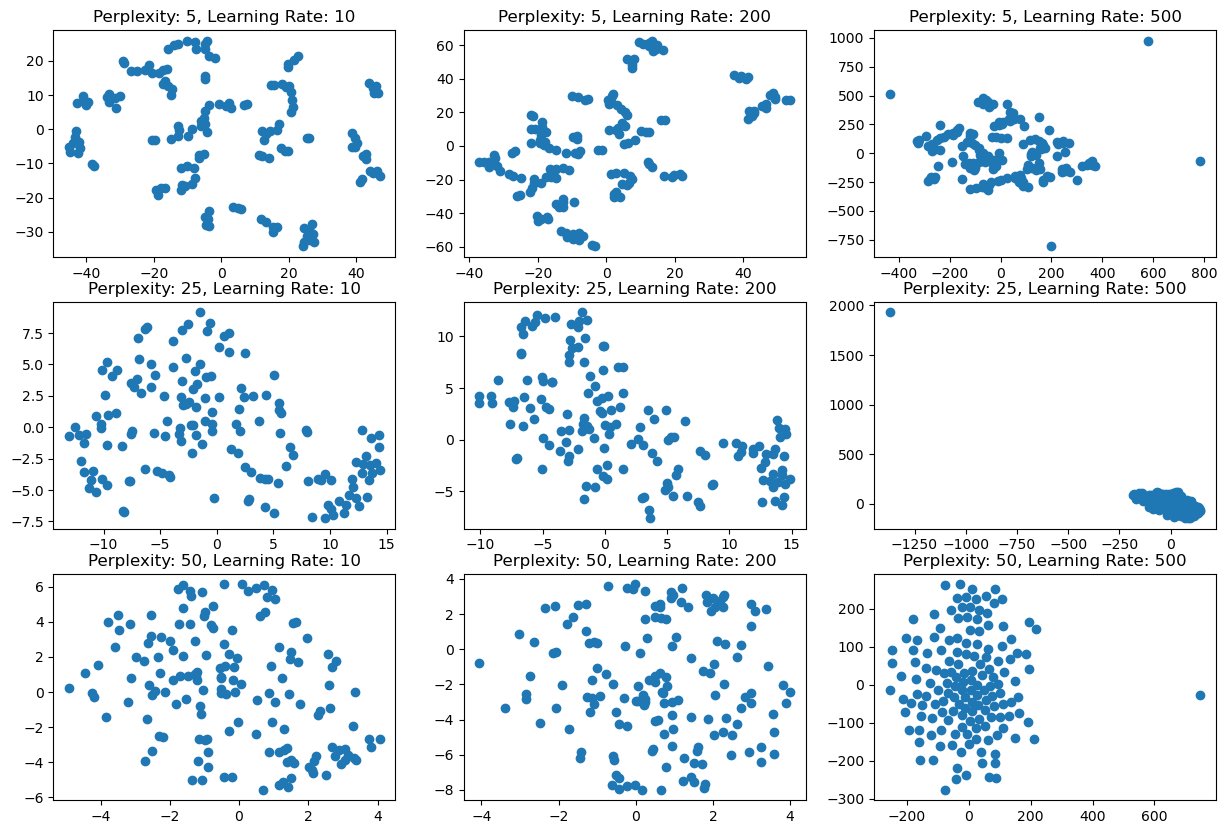

In [45]:
#parameter tuning for t-SNE (perplexity)
perplexities = [5, 25, 50]
learning_rates = [10, 200, 500]

fig, axs = plt.subplots(len(perplexities), len(learning_rates), figsize=(15, 10))

for i, perplexity in enumerate(perplexities):
    for j, learning_rate in enumerate(learning_rates):
        tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, n_iter=1000)
        X_tsne = tsne.fit_transform(X)
        axs[i, j].scatter(X_tsne[:, 0], X_tsne[:, 1])
        axs[i, j].set_title(f'Perplexity: {perplexity}, Learning Rate: {learning_rate}')

plt.show()

As shown in the graph, the lower perplexity the better for analyzing the data.
Compared to PCA, I think t-SNE is less practical to this dataset than PCA.

## Project Report - Evaluation and comparasion

### PCA 
Strength: 

1. PCA is better to be used in the small and simple constructed dataset.
   
2. It reduce the noise in the dataset
   
3. preserve the global structure
   
4. works well with linear dimensionality reduction
   
Weakness:

1. does not involve hyperparameter tuning
   
2. Oversimplification of the data

### t-SNE
Strength:

1. involve hyperparameters tuning
   
2. Preserves Local and Global Structure
   
Weakness:

1. when we are trying to reducing the dimension, the  distance between points in low dimension are actually not match with the actual distance of the high dimension
   
2. In the high dimension, if the distance between points are large, but when we convert to low dimension, the distance may be smaller.

### Conclusion

If the dataset is more linear and dataset size is small, using PCA would be better.
If the dataset is not linear and the dataset size is large, using t-SNE would be better.

I think PCA is better to use in this dataset because as shown in the t-SNE graphs, I don't think the pattern are easily shown or analyized but PCA's graph are more easier to see and analyze. Also, my dataset is not large, so it's better to use PCA over t-SNE.